# Data Visualization Part I

![](https://media.giphy.com/media/3og0IExSrnfW2kUaaI/giphy.gif)

### Lesson Objectives:

By the end of this lesson students will be able to:

- Understand the importance of data visualization
- Understand how data visualization fits within the CRISP-DM Model and the EDA process
- Know **when to use** and **how to produce** the following graphs:
    - Line
    - Histogram
    - Bar
    - Scatterplot
    - Box and Whisker/Violin plots

## Activity

Read the article [Why is Data Visualization Important?  What is Important in Data Visualization](https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/2) in your group and discuss the following questions:

1. What is data visualization useful for?
2. In what ways does the intended audience change what or how we produce data visualizations?
3. When choosing our type of graphic what are the advantages/disadvantages of choosing well known visualizations vs new and exciting visualizations?


### How does data visualization fit into the data science process?

Remember this CRISP-DM Model?

<img src='https://storage.ning.com/topology/rest/1.0/file/get/2808314343?profile=RESIZE_480x480' width='400'>

### Exploratory vs Explanatory Analysis

While data visualization can be used throughout many of the CRISP-DM steps it is most commonly used as part of __Exploratory Data Analysis (EDA)__ in the data understanding step or as a way to __explain__ the results your models.  Another goal of data visualization could be to create an interactive display of results as an end product. 

#### Exploratory Analysis Goals:

- Identify outliers
- Identify data that needs transformation
- Generate ideas for modeling
- Assessing assumptions underlying models
- Support the selection of appropriate techniques




#### Explanatory Analysis Goals:

- Explain key factors in a prediction
- Explain how the results of your analysis
- Provide easily interpretation of how your model works

## _Data Visualization helps tell your "Story"_

## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. There is a lot of code in the cell below which will become much more familiar as we proceed through the course.  For now, just take a glance, but don't worry if it doesn't make sense yet.

In [1]:
# One of several libraries you will get real used to importing. 
# https://matplotlib.org/3.1.1/index.html
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# Importing the iris dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd

#creating a dataframe of the iris dataset
data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](iris_virginica.jpg)

### Dataframe vs Graph: Which do you prefer?

As data scientists, you will look at dataframes everyday.  You will learn how to inspect different aspects of them with the methods associated with the dataframe object.  For example, to get a quick idea of the type of data, we can use the .sample() method.

In [2]:
# I like to use sample rather than head because it gives me a better idea of the distribution of observations
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
111,6.4,2.7,5.3,1.9,2
17,5.1,3.5,1.4,0.3,0
1,4.9,3.0,1.4,0.2,0
34,4.9,3.1,1.5,0.2,0
65,6.7,3.1,4.4,1.4,1


One skill you will develop is the ability to quickly generate visualizations after getting a general sense of the dataframe contents.  Let's plot two of the columns above, sepal length vs petal length. With a glance, we can see new patterns in the data. 

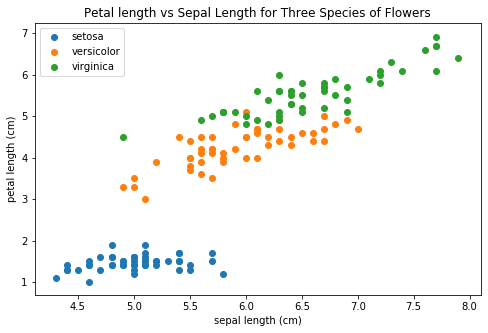

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

In [4]:
# your thoughts here

In your **presentation decks**, you will no doubt be tempted to print out the head of a data frame, take a screen shot, and plop it in the middle of a slide.  We all have that instinct; the dataframe object will become one your most cherished objects. If you put them in your deck, you will no doubt hear one of us gently request its replacement with some other figure.

### Anscombe's Quartet --- A Reason for Data Visualization

In [5]:
# Load the example dataset for Anscombe's quartet
import seaborn as sns
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [6]:
# use groupby, get the mean and variance of each data set
df.groupby(['dataset']).agg(['mean','var'])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [7]:
# we can also examine the correlation between the dataset
df.groupby(['dataset']).corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

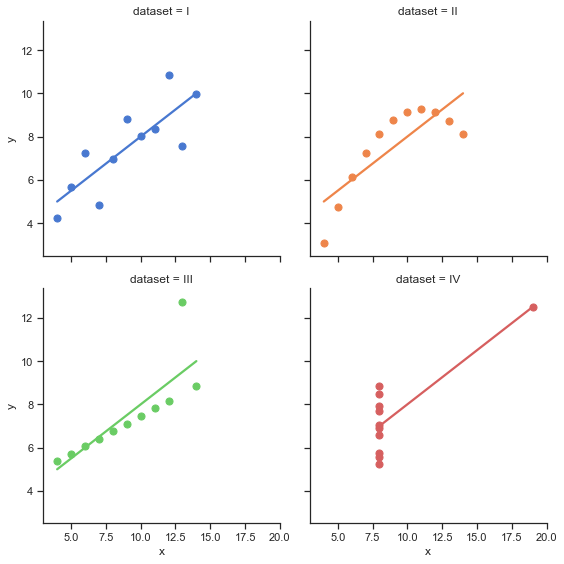

In [8]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

Also check out [Datasuarus Dozen](https://www.autodeskresearch.com/publications/samestats) 

## The Effectiveness of Visualizations

- People are **highly visual** and can synthesize visual information such more quickly than rows and columns of numbers 
- **Precognitive** understanding of the data
- Visual representations can be much more **viscerally persuasive**

## What Makes an Effective Visualization?

- Each graph should have a **clear poin**t it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective.

- Know your **audience**! Come up with a use case and audience to pitch your visualizations.  Not every visualization is good for every audience.  Is your audience technical?  Non-technical?

- Choosing the correct graph for the **relationship** you are trying to communicate.  

- **Label** your axes and title your graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
     - **Red** and Down tends to be negative while **Green** and Up is positive
     - **Lighter hues** are seen as lower values and darker is higher values
     - Axes should start at **zero**
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns

        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="data/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="data/usa-today-2.png" width=600>

# Matplotlib

The matplotlib library will be our foundational visualization tool. Mastering it will allow you to create beautiful graphs quickly.  We can then include these graphs in our README's, final notebooks, and presentation decks. 

<img src="data/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

# Common Charts and Their Uses

## Line Graph

Line graphs are used to track changes of a **single variable** over short and long **periods of time**. When smaller changes exist, line graphs are better to use than bar graphs. They will become especially useful when we look into time series.

#### Let's build a line graph to show the change in average temperature over time

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
### Create a fake data set
rng = np.arange(50)
temp = np.random.randint(65, 110, size=(rng.size))
temp=np.sort(temp)
yrs = 1950 + rng

In [11]:
temp

array([ 65,  66,  66,  66,  67,  68,  69,  69,  70,  70,  70,  73,  74,
        74,  75,  76,  77,  77,  78,  80,  80,  82,  83,  84,  86,  87,
        89,  90,  91,  92,  93,  94,  94,  95,  96,  97,  97,  98,  99,
        99, 100, 101, 101, 102, 102, 104, 104, 105, 107, 108])

In [12]:
yrs

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999])

#### Plotting Syntax

There are many different ways to create plots but we will strongly suggest using the subplots method
   - fig, ax = plt.subplots()
   - fig, (ax_1, ax_2) = plt.subplots(1,2)

- This is useful for extensibility
- Gives you access to the figure and individual axis in a plot
- More fine grained control of customizing your plot
- Easily create additional axis on your figure
- This syntax is a good level of abstraction
    - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
- Flatiron Specific
    - Plotting code will be more easily readable for other students and instructors
    - You don’t need to remember many different ways to organize your code
    
Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

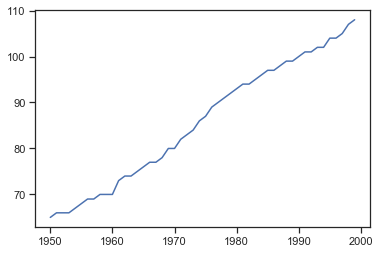

In [13]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the data variable in blue
ax.plot( yrs, temp,color='b')

plt.show()

## Bar Chart

Bar graphs are used to **compare a variable between different groups/categories**. Sometimes they are used to measure change over time, but that is often when you think of a time period as a group, like decades, and changes between those groups are quite large.  

Often people avoid using bar charts because they are **common**.  This is a mistake!  We should often use bar charts because they are common and require less effort of your audience to understand them!

#### Let's create a Bar chart to compare the average height of males and females

In [14]:
import pandas as pd

data = pd.read_csv('./data/weight-height.csv', index_col=False)

In [15]:
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']

In [16]:
females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


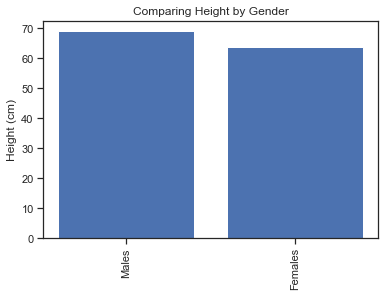

In [17]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Males', 'Females'], [males['Height'].mean(), females['Height'].mean()])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(['Males', 'Females'], rotation=90)

# Set the y-axis label
ax.set_ylabel("Height (cm)")

ax.set_title('Comparing Height by Gender')

plt.show()

### Your turn!

With your group, create a bar chart of the average weight by gender.

In [18]:
# your code here

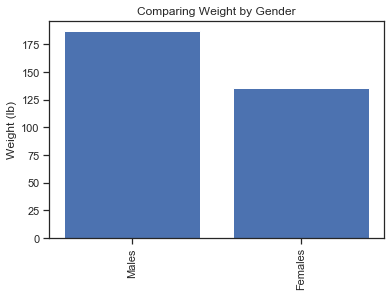

In [19]:
#SOLUTION

fig, ax = plt.subplots()

# Plot a bar-chart of weights by gender
ax.bar(['Males', 'Females'], [males['Weight'].mean(), females['Weight'].mean()])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(['Males', 'Females'], rotation=90)

# Set the y-axis label
ax.set_ylabel("Weight (lb)")

ax.set_title('Comparing Weight by Gender')

plt.show()

## Box Plot

A box and whisker plot—also called a box plot—displays the five-number summary of **a single variable**.  This plot helps us see the **distribution of a continuous variable**. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

<img src="https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/img/5214889_01-eng.gif" alt="boxplot" title="Box Plot" width="550" />





#### Let's create a box plot to examine the height of males and females.

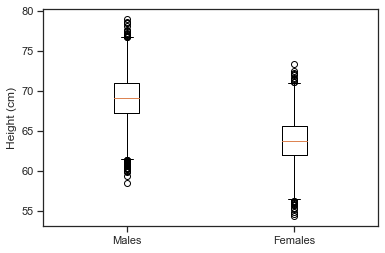

In [20]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([males['Height'], females['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Males', "Females"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Your turn!

With your group, create a box plot of the average weight by gender.

In [21]:
# your code here

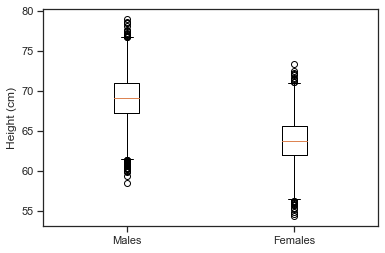

In [22]:
# SOLUTION
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([males['Height'], females['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Males', "Females"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

## Violin Plots

Violin plots are similar to box plots, except that they also show the **probability density** of the data at different values.

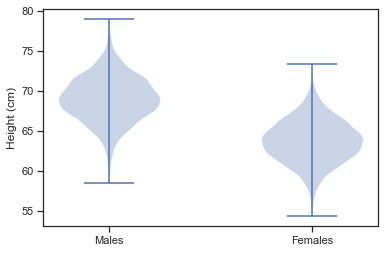

In [23]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.violinplot([males['Height'], females['Height']])

# Add x-axis tick labels:
ax.get_xaxis().set_tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1, 2 + 1))
ax.set_xticklabels(['Males', "Females"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Question:

Does it make sense to make a box plot or violin plot of a categorical variable?  Why or why not?

## Histogram

A histogram is a plot that lets you discover the **underlying frequency distribution (shape) of a set of continuous data**. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. The height of each bar shows the quantity in each range.

(Similar to a Bar Graph, **but in a Histogram each bar is for a range of data.**)

<img src="https://statistics.laerd.com/statistical-guides/img/histogram-1.png" alt="viz" title="Histogram" width="350" />

**How do you construct a histogram from a continuous variable?**

To construct a histogram from a continuous variable you first need to split the data into intervals, called bins. In the example above, age has been split into bins, with each bin representing a 10-year period starting at 20 years. Each bin contains the number of occurrences of scores in the data set that are contained within that bin. For the above data set, the frequencies in each bin have been tabulated along with the scores that contributed to the frequency in each bin (see below):

<img src="./images/binned.png" alt="viz" title="Histogram" width="550" />

**Choosing the correct bin width**  

There is no right or wrong answer for how wide we should define our bin size, but there are rules of thumb. You need to make sure that the bins are not too small or too large. Consider the histogram we produced earlier (see above): the following histograms use the same data, but have either much smaller or larger bins, as shown below:


<img src="https://statistics.laerd.com/statistical-guides/img/histogram-4.png" alt="viz" title="Histogram" width="550" />


#### Let's make a histogram for the height of females

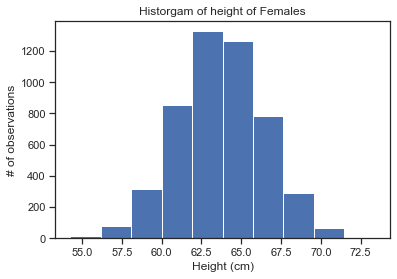

In [24]:
fig, ax = plt.subplots()
# Plot a histogram of height for females
ax.hist(females['Height'])


# Set the x-axis label to height (cm)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height of Females')

plt.show()

#### Your turn! 

Make a histogram for the height of males

In [25]:
#your code here

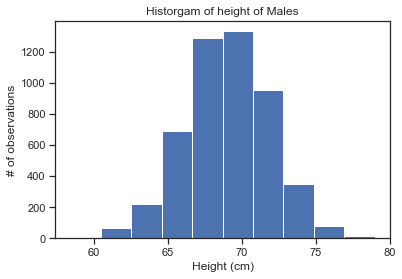

In [26]:
#SOLUTION

fig, ax = plt.subplots()
# Plot a histogram of height for females
ax.hist(males['Height'])


# Set the x-axis label to height (cm)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height of Males')

plt.show()

### Can we put both on the same plot?

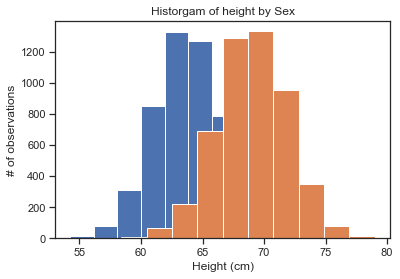

In [27]:
fig, ax = plt.subplots()
# Plot a histogram of height for females
ax.hist(females['Height'])

# Compare to histogram of height for males
ax.hist(males['Height'])

# Set the x-axis label to height (cm)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height by Sex')

plt.show()

### Adding parameters to make data more clear

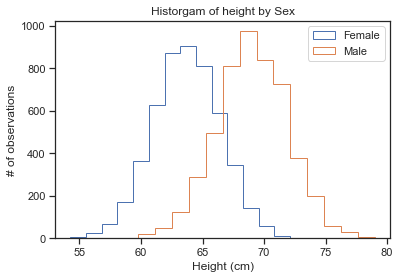

In [28]:
fig, ax = plt.subplots()
# Plot a histogram of height of females with 15 bins
ax.hist(females['Height'], label="Female", bins=15, histtype='step')

# Compare to histogram of height for males with 15 bins
ax.hist(males['Height'], label="Male", bins=15, histtype='step')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height by Sex')

ax.legend()
plt.show()


### What is the difference between a bar chart and a histogram?

The major difference is that a histogram is only used to **plot the frequency of score occurrences in a continuous data set** that has been divided into classes, called bins. On the other hand, bar charts can be used for a great deal of other types of variables including ordinal and nominal data sets. Additionally, in histograms we so not have spaces between the bars like we do in bar charts.

## Scatterplot

Scatterplots, also referred to as an 'X-Y plot', are used to **show/determine relationships between the two different variables**. It compares the values of different variables across observations. 

The x-axis is used to measure one event (or variable) and the y-axis is used to measure the other. If both variables increase at the same time, they have a positive relationship. If one variable decreases while the other increases, they have a negative relationship. Sometimes the variables don't follow any pattern and have no relationship.

<img src="https://python-graph-gallery.com/wp-content/uploads/130_Basic_Matplotlib_Scatterplot.png" width="550" />

### Let's create a scatterplot of height vs weight

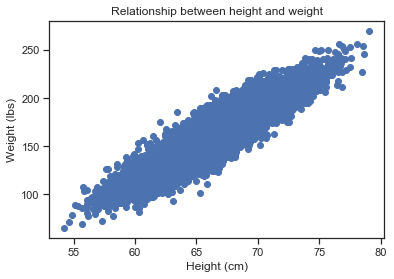

In [29]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(data["Height"], data["Weight"])

# Set the x-axis label to height (cm)"
ax.set_xlabel("Height (cm)")

# Set the y-axis label weight (lbs)
ax.set_ylabel("Weight (lbs)")

ax.set_title('Relationship between height and weight')


plt.show()

### Now let's change the color of the data by gender

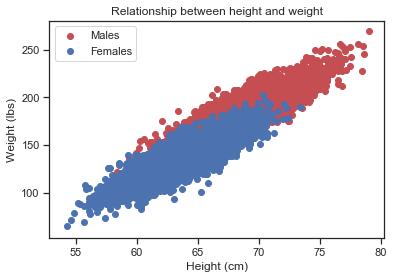

In [30]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(males["Height"], males["Weight"],label='Males', color ='r' )

ax.scatter(females["Height"], females["Weight"], label='Females',color ='b' )

# Set the x-axis label to "Height (cm)"
ax.set_xlabel("Height (cm)")

# Set the y-axis label to "Weight (lbs)"
ax.set_ylabel("Weight (lbs)")

ax.set_title('Relationship between height and weight')

ax.legend()
plt.show()

### Your turn!

Using the `candy.csv` dataset complete the following:
- import data into pandas
- create a scatterplot of sugar percent vs price percent
    - make sure to include axes labels and a title
- color code the data by if the candy is chocolate or not

In [31]:
candy = pd.read_csv('./data/candy.csv')
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [32]:
#your code here

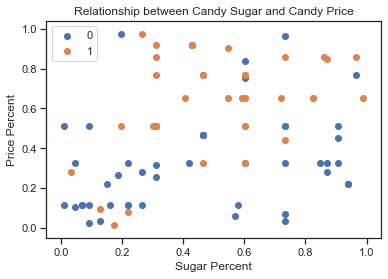

In [33]:
#SOLUTION
fig, ax = plt.subplots()

#set groups to be used in the plot
groups = candy.groupby('chocolate')

# for each group plot the sugar percent and the pricepercent and label by group name
for name, group in groups:
    ax.scatter(group.sugarpercent, group.pricepercent, label=name)

# Set the x-axis label 
ax.set_xlabel("Sugar Percent")

# Set the y-axis label
ax.set_ylabel("Price Percent")

ax.set_title('Relationship between Candy Sugar and Candy Price')

ax.legend()
plt.show()

![](https://python-graph-gallery.com/wp-content/uploads/Logo_PGG_full-3.jpg)
For help on creating graphs check out the [Python Graph Gallery](https://python-graph-gallery.com/)

![](https://media.giphy.com/media/XHVmD4RyXgSjd8aUMb/giphy.gif)